In [2]:
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [42]:
scores = pd.read_pickle('multi_patients_aligned.pkl')


# scores = scores[(scores['EI_p'] > 20) & (scores['EI_p'] < 80)]

# scores = scores[(scores.EI_p > scores.EI_p.quantile(.05)) & (scores.EI_p < scores.EI_p.quantile(.95))]

#scores = scores[(scores['EI_e'] > 40) & (scores['EI_e'] < 140)]

# scores = scores[(scores.EI_e > scores.EI_e.quantile(.05)) & (scores.EI_e < scores.EI_e.quantile(.95))]


scores['DateDiff'] = scores['DateDiff'].apply(lambda x: x.days)
# scores = scores[scores['DateDiff'] < 730]

# scores = scores[scores['Muscle'] == 'Biceps brachii']

scores['EIdiff'] = scores['EI_e'] -  scores['EI_p']
fig = px.scatter(scores, x='EI_p', y='EI_e', size='DateDiff',trendline="ols")
fig.show()



In [40]:

results = px.get_trendline_results(fig)
print(results.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     434.5
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.70e-69
Time:                        09:48:06   Log-Likelihood:                -1980.4
No. Observations:                 481   AIC:                             3965.
Df Residuals:                     479   BIC:                             3973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7843      2.326     11.944      0.0

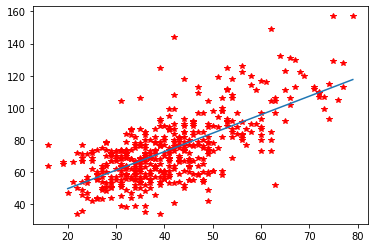

0.46528638319428767


In [51]:
import pickle

pf = PolynomialFeatures(degree=3)
lr = LinearRegression(fit_intercept=True)
x_t = pf.fit_transform(scores['EI_p'].to_numpy().reshape(-1,1))

# lr.fit(x_t, scores['EI_e'])

lr.fit(scores['EI_p'].to_numpy().reshape(-1,1), scores['EI_e'])

plt.figure()
plt.plot(scores['EI_p'], scores['EI_e'], 'r*')
base = np.arange(20, 80, 1)
# sa = pf.transform(base.reshape(-1,1))
pred = lr.predict(base.reshape(-1,1))
plt.plot(base,pred)
plt.show()
#print(lr.score(pf.transform(scores['EI_p'].to_numpy().reshape(-1,1)), scores['EI_e']))
print(lr.score(scores['EI_p'].to_numpy().reshape(-1,1), scores['EI_e']))
with open('linear_regression_philips_to_esoate.pkl', 'wb') as f:
    pickle.dump(lr,f)

In [27]:
scores['Muscle'].value_counts()